# PCA - eigen faces

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import decomposition

In [6]:
# Loading "Labeled Faces in the Wild" dataset which contains images of celebritys faces

data = datasets.fetch_lfw_people(resize=0.8, min_faces_per_person=40)

In [10]:
data.images.shape # 1706 images in dataset with dimensions [100x75]

(1706, 100, 75)

In [11]:
data.images[1].shape # image dimensions

(100, 75)

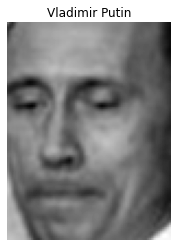

In [73]:
index = np.random.choice(np.arange(0, data.images.shape[0]), 1)[0]
plt.imshow(data.images[index], cmap = 'gray')
plt.title(data.target_names[data.target[index]])
plt.axis('off')
plt.show()

In [27]:
data.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Gloria Macapagal Arroyo', 'Jacques Chirac',
       'Jean Chretien', 'Jennifer Capriati', 'John Ashcroft',
       'Junichiro Koizumi', 'Laura Bush', 'Lleyton Hewitt',
       'Serena Williams', 'Tony Blair', 'Vladimir Putin'], dtype='<U23')

In [30]:
count_imgs_per_name = np.bincount(data.target)
count_imgs_per_name

array([ 77, 236, 121, 530, 109,  44,  52,  55,  42,  53,  60,  41,  41,
        52, 144,  49], dtype=int64)

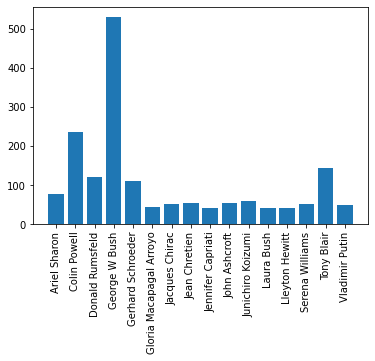

In [34]:
plt.bar(np.arange(0, len(data.target_names)), count_imgs_per_name)
plt.xticks(np.arange(0, len(data.target_names)), labels = data.target_names, rotation = 'vertical')
plt.show()

In [74]:
data.target

array([ 3, 10, 14, ...,  3, 12,  6], dtype=int64)

In [76]:
data.data.shape # flaten imgs

(1706, 7500)

In [77]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.data, data.target, test_size = 0.33, random_state = 7, stratify = data.target)

In [78]:
X_train.shape

(1143, 7500)

In [79]:
X_test.shape

(563, 7500)

In [80]:
from sklearn import neighbors

In [81]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print('Model accuracy: ', score)

Model accuracy:  0.5133214920071048


In [85]:
pca = decomposition.PCA(n_components = 100)
pca.fit(X_train)
X_train_pca_transformed = pca.transform(X_train)
X_test_pca_transformed = pca.transform(X_test)

X_train_pca_transformed.shape, X_test_pca_transformed.shape

((1143, 100), (563, 100))

In [87]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_pca_transformed, y_train)
score_pca = knn.score(X_test_pca_transformed, y_test)
print('Model accuracy: ', score_pca)

Model accuracy:  0.4937833037300178


Accuracy is almost the same even when dimension is reduced 750 times

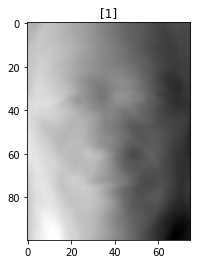

In [108]:
# extract and convert random component into img

component_number = np.random.choice(np.arange(0, 5), 1)
component = pca.components_[component_number]
component = component.reshape(data.images[0].shape)

# show img and number of component

plt.title(component_number)
plt.imshow(component, cmap='gray')